Attributes: (all numeric-valued)                                                                                                         
2)Number of times pregnant                                                                                                              
3)Plasma glucose concentration a 2 hours in an oral glucose tolerance test                                                             
4)Diastolic blood pressure (mm Hg)                                                                                                     
5)Triceps skin fold thickness (mm)                                                                                                
6)2-Hour serum insulin (mu U/ml)                                                                                                   
7)Body mass index (weight in kg/(height in m)^2)                                                                                                                               
8)Diabetes pedigree function                                                                                                                  
9)Age (years)                                                                                                                                                                           
10)Class variable (0 or 1)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
%matplotlib inline
## Import Keras objects for Deep Learning

from keras.models  import Sequential, K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [4]:
diabetes_df = pd.read_csv('C:/Users/saidh/Desktop/End to End Multiple Disease Detection/data/diabetes.csv')


In [5]:
# Take a peek at the data -- if there are lots of "NaN" we may have internet connectivity issues
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
709,2,93,64,32,160,38.0,0.674,23,1
131,9,122,56,0,0,33.3,1.114,33,1
521,3,124,80,33,130,33.2,0.305,26,0
722,1,149,68,29,127,29.3,0.349,42,1
614,11,138,74,26,144,36.1,0.557,50,1


In [6]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["Outcome"].values

In [7]:
# Split the data to Train, and Test (75%, 25%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [8]:
np.mean(y), np.mean(1-y)


(0.3489583333333333, 0.6510416666666666)

Above, we see that about 35% of the patients in this dataset have diabetes, while 65% do not. This means we can get an accuracy of 65% without any model - just declare that no one has diabetes. We will calculate the ROC-AUC score to evaluate performance of our model, and also look at the accuracy as well to see if we improved upon the 65% accuracy.

Baseline performance using Random Forest
To begin, and get a baseline for classifier performance:

We train a Random Forest model with 200 trees on the training data.
We calculate the accuracy and roc_auc_score of the predictions.

In [9]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [10]:
# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.766
roc-auc is 0.828


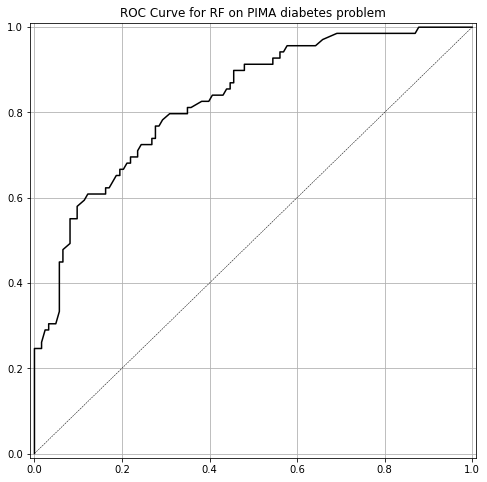

In [12]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])


plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')

Building a Single Hidden Layer Neural Network
We will use the Sequential model to quickly build a neural network. Our first network will be a single layer network. We have 8 variables, so we set the input shape to 8. Let's start by having a single hidden layer with 12 nodes.

In [14]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [17]:
classifier = Sequential()
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
classifier.add(Dropout(p=0.1))
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
classifier.add(Dropout(p=0.1))
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

C:\Users\saidh\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  
C:\Users\saidh\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\saidh\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\saidh\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  """
C:\Users\saidh\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update 

In [18]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                496       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Train on 576 samples, validate on 192 samples
Epoch 1/200
576/576 [==============================] - 0s 671us/step - loss: 0.4676 - acc: 0.7760 - val_loss: 0.4963 - val_acc: 0.7500
Epoch 2/200
576/576 [==============================] - 0s 72us/step - loss: 0.4675 - acc: 0.7778 - val_loss: 0.4962 - val_acc: 0.7500
Epoch 3/200
576/576 [==============================] - 0s 70us/step - loss: 0.4673 - acc: 0.7760 - val_loss: 0.4961 - val_acc: 0.7500
Epoch 4/200
576/576 [==============================] - 0s 66us/step - loss: 0.4672 - acc: 0.7760 - val_loss: 0.4960 - val_acc: 0.7500
Epoch 5/200
576/576 [==============================] - 0s 78us/step - loss: 0.4669 - acc: 0.7760 - val_loss: 0.4959 - val_acc: 0.7500
Epoch 6/200
576/576 [==============================] - 0s 76us/step - loss: 0.4668 - acc: 0.7778 - val_loss: 0.4958 - val_acc: 0.7500
Epoch 7/200
576/576 [==============================] - 0s 66us/step - loss: 0.4666 - acc: 0.7760 - val_loss: 0.4957 - val_acc: 0.7500
Epoch 8/200
576

576/576 [==============================] - 0s 69us/step - loss: 0.4541 - acc: 0.7830 - val_loss: 0.4910 - val_acc: 0.7604
Epoch 122/200
576/576 [==============================] - 0s 53us/step - loss: 0.4541 - acc: 0.7812 - val_loss: 0.4910 - val_acc: 0.7604
Epoch 123/200
576/576 [==============================] - 0s 77us/step - loss: 0.4540 - acc: 0.7812 - val_loss: 0.4910 - val_acc: 0.7604
Epoch 124/200
576/576 [==============================] - 0s 60us/step - loss: 0.4539 - acc: 0.7812 - val_loss: 0.4910 - val_acc: 0.7604
Epoch 125/200
576/576 [==============================] - 0s 55us/step - loss: 0.4538 - acc: 0.7812 - val_loss: 0.4910 - val_acc: 0.7604
Epoch 126/200
576/576 [==============================] - 0s 51us/step - loss: 0.4538 - acc: 0.7830 - val_loss: 0.4910 - val_acc: 0.7604
Epoch 127/200
576/576 [==============================] - 0s 60us/step - loss: 0.4537 - acc: 0.7830 - val_loss: 0.4910 - val_acc: 0.7604
Epoch 128/200
576/576 [==============================] - 0s 59

In [23]:
y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

In [24]:
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [25]:
y_pred_prob_nn_1[:10]

array([[0.5193864 ],
       [0.65645045],
       [0.3038667 ],
       [0.32708207],
       [0.14101179],
       [0.4818973 ],
       [0.03096959],
       [0.36212036],
       [0.89908355],
       [0.11148386]], dtype=float32)

accuracy is 0.766
roc-auc is 0.816


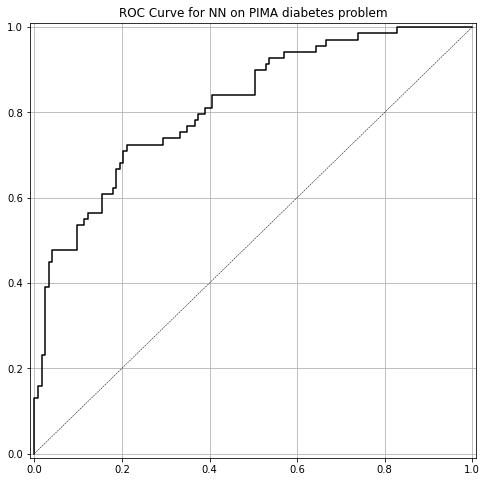

In [26]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

In [28]:
run_hist_1.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

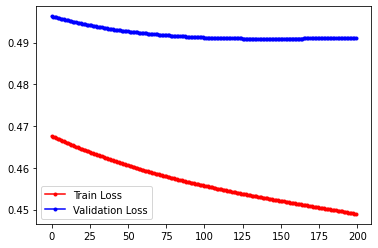

In [29]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

Our accuracy is 257.89473684210526%


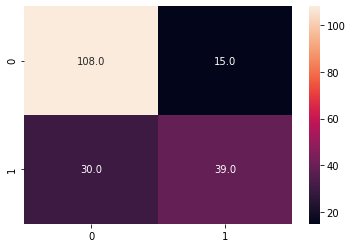

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_class_nn_1)
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))
sns.heatmap(cm,annot=True, fmt=".1f")
plt.savefig('g.png')